# Stock Analysis

### Author : 钟智强

#### Objectives
The main objectives of this analysis are:
1. **Data Collection**: Gather historical stock price data for Stocks from a reliable financial data source.
2. **Exploratory Data Analysis (EDA)**: Conduct a thorough exploratory data analysis to understand the trends, patterns, and anomalies in  stock prices.
3. **Technical Analysis**: Apply various technical indicators and charting techniques to identify potential trading signals and trends.
4. **Statistical Analysis**: Perform statistical tests and analyses to assess the stock's performance and volatility.
5. **Predictive Modeling**: Develop predictive models to forecast future stock prices based on historical data.
6. **Sentiment Analysis**: Analyze market sentiment related to Stocks by incorporating news and social media data.



1. Get Stocks Information and Price

> Import dependencies

In [1]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


stock = "INTC"  # Change this Accordingly


current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

nvidia = yf.Ticker("NVDA")
intel = yf.Ticker("INTC")
meta = yf.Ticker("META")
tme = yf.Ticker("TME")
xau = yf.Ticker("GC=F")

nvidia_stock_data = nvidia.history(period="1d")
intel_stock_data = intel.history(period="1d")
meta_stock_data = meta.history(period="1d")
tme_stock_data = tme.history(period="1d")
xau_stock_data = xau.history(period="1d")

2. Display latest Stock table

In [2]:
current_price = nvidia_stock_data["Close"][0]
open_price = nvidia_stock_data["Open"][0]
high_price = nvidia_stock_data["High"][0]
low_price = nvidia_stock_data["Low"][0]
volume = nvidia_stock_data["Volume"][0]

i_current_price = intel_stock_data["Close"][0]
i_open_price = intel_stock_data["Open"][0]
i_high_price = intel_stock_data["High"][0]
i_low_price = intel_stock_data["Low"][0]
i_volume = intel_stock_data["Volume"][0]

m_current_price = meta_stock_data["Close"][0]
m_open_price = meta_stock_data["Open"][0]
m_high_price = meta_stock_data["High"][0]
m_low_price = meta_stock_data["Low"][0]
m_volume = meta_stock_data["Volume"][0]

t_current_price = tme_stock_data["Close"][0]
t_open_price = tme_stock_data["Open"][0]
t_high_price = tme_stock_data["High"][0]
t_low_price = tme_stock_data["Low"][0]
t_volume = tme_stock_data["Volume"][0]

x_current_price = xau_stock_data["Close"][0]
x_open_price = xau_stock_data["Open"][0]
x_high_price = xau_stock_data["High"][0]
x_low_price = xau_stock_data["Low"][0]
x_volume = xau_stock_data["Volume"][0]

# Combine data into a single DataFrame
combined_stock_data = {
    "Datetime": current_datetime,
    "Stock Ticker": ["NVDA", "INTC", "META", "TME", "XAU"],
    "Open Price": [
        f"${open_price:.2f}",
        f"${i_open_price:.2f}",
        f"${m_open_price:.2f}",
        f"${t_open_price:.2f}",
        f"${x_open_price:.2f}",
    ],
    "High Price": [
        f"${high_price:.2f}",
        f"${i_high_price:.2f}",
        f"${m_high_price:.2f}",
        f"${t_high_price:.2f}",
        f"${x_high_price:.2f}",
    ],
    "Low Price": [
        f"${low_price:.2f}",
        f"${i_low_price:.2f}",
        f"${m_low_price:.2f}",
        f"${t_low_price:.2f}",
        f"${x_low_price:.2f}",
    ],
    "Current Price": [
        f"${current_price:.2f}",
        f"${i_current_price:.2f}",
        f"${m_current_price:.2f}",
        f"${t_current_price:.2f}",
        f"${x_current_price:.2f}",
    ],
    "Volume": [volume, i_volume, m_volume, t_volume, x_volume],
}

# Create a DataFrame
df = pd.DataFrame(combined_stock_data)

# Display the DataFrame
display(df)

,Datetime,Stock Ticker,Open Price,High Price,Low Price,Current Price,Volume
0,2024-09-06 11:59:55,NVDA,$104.99,$109.65,$104.76,$107.21,305774900
1,2024-09-06 11:59:55,INTC,$19.28,$19.90,$19.24,$19.40,65298900
2,2024-09-06 11:59:55,META,$511.72,$521.63,$511.15,$516.86,8626200
3,2024-09-06 11:59:55,TME,$10.44,$10.54,$10.27,$10.32,7806400
4,2024-09-06 11:59:55,XAU,$2547.10,$2547.90,$2542.80,$2547.30,9162


3. Download Datasets

In [3]:
ticker = stock  

download = False

stock_data = yf.download(ticker, start="2024-08-01", end="2024-08-31")

display(stock_data)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-01,30.430000,30.709999,28.889999,29.049999,28.866879,107672500
2024-08-02,21.940001,21.980000,20.420000,21.480000,21.344599,300895900
2024-08-05,20.200001,20.389999,19.290001,20.110001,19.983234,147385700
2024-08-06,20.320000,20.629999,19.750000,19.830000,19.705000,106670400
2024-08-07,19.920000,20.250000,18.950001,18.990000,18.990000,97972300
2024-08-08,19.100000,20.549999,18.840000,20.490000,20.490000,96836800
2024-08-09,20.080000,20.150000,19.500000,19.709999,19.709999,76394500
2024-08-12,19.870001,19.969999,19.000000,19.360001,19.360001,54677600
2024-08-13,19.480000,20.480000,19.469999,20.469999,20.469999,77511300


4. Process downloaded datasets

In [4]:
stock_data["Date"] = stock_data.index
stock_data["Day"] = stock_data["Date"].apply(lambda x: x.day)
stock_data["Month"] = stock_data["Date"].apply(lambda x: x.month)
stock_data["Year"] = stock_data["Date"].apply(lambda x: x.year)

features = stock_data[["Day", "Month", "Year"]]
target = stock_data["Close"]

# Split Data

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.5, random_state=42
)

5. Train Model

### Linear Regression Model

Linear regression is utilized to model the relationship between independent variables (features) and the dependent variable (target, in this case, stock prices). The formula for a simple linear regression can be represented as:

$$
\hat{y} = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + \ldots + b_n \cdot x_n
$$
- **Variables**:
  - \(\hat{y}\): Predicted value (predicted stock price).
  - \(b_0, b_1, \ldots, b_n\): Coefficients determined during model training.
  - \(x_1, x_2, \ldots, x_n\): Input features (day, month, year).

### Mean Squared Error (MSE)

Mean Squared Error measures the average squared difference between predicted values and actual values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **Variables**:
  - \(y_i\): Actual values.
  - \(\hat{y}_i\): Predicted values.
  - \(n\): Number of samples.


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

display(f"Mean Squared Error: {mse}")

'Mean Squared Error: 8.597530114057621'

6. Visualise the predicted Data.

Data visualization is achieved using Matplotlib to plot actual and predicted stock prices over time:

- **Matplotlib**: Python library for plotting.
- **Subplots**: `plt.subplots(2, 1)` creates two vertically stacked subplots.
- **Plotting**: `ax[0].plot()` and `ax[1].plot()` are used to plot actual and predicted prices, with various styling options (`color`, `alpha`, `linestyle`, `legend`, `grid`) applied for clarity.

### Data Collection and Preparation

- Historical stock price data is fetched using `yfinance` for stocks such as Nvidia (`NVDA`), Intel (`INTC`), Meta (`META`), and Tencent Music (`TME`).
- Data is processed (`DataFrame` manipulation) to extract features (`Day`, `Month`, `Year`) and the target variable (`Close` price).


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

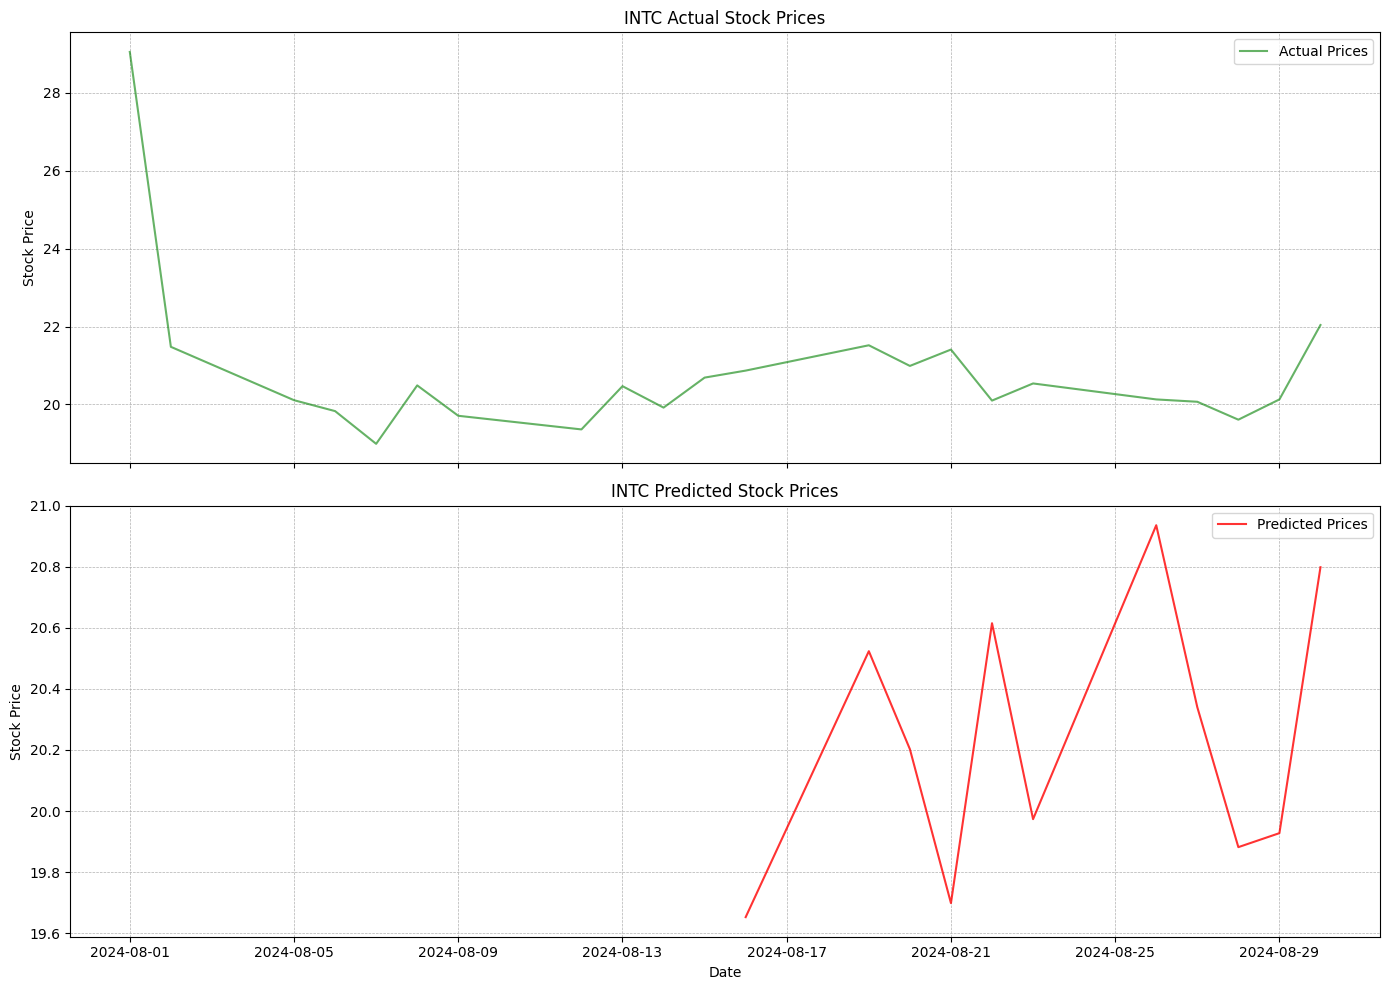

In [7]:
from matplotlib.dates import DateFormatter

# Create a new DataFrame to hold the dates and predictions
pred_df = pd.DataFrame(
    {
        "Date": stock_data["Date"][len(stock_data) - len(predictions) :],
        "Predicted": predictions,
    }
)

# Set up the subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot actual prices
ax[0].plot(
    stock_data["Date"],
    stock_data["Close"],
    label="Actual Prices",
    color="green",
    alpha=0.6,
)
ax[0].set_ylabel("Stock Price")
ax[0].set_title(f"{ticker} Actual Stock Prices")
ax[0].legend()
ax[0].grid(True, which="both", linestyle="--", linewidth=0.5)

ax[1].plot(
    pred_df["Date"],
    pred_df["Predicted"],
    label="Predicted Prices",
    color="red",
    linestyle="-",
    alpha=0.8,
)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Stock Price")
ax[1].set_title(f"{ticker} Predicted Stock Prices")
ax[1].legend()
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()

display(plt)

Output Current Price of selected Stock to csv

In [8]:
if download: md_data = stock_data.to_csv(f"output/{ticker}_Price-{current_datetime}", index=False) 

Calculate Moving Averages

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

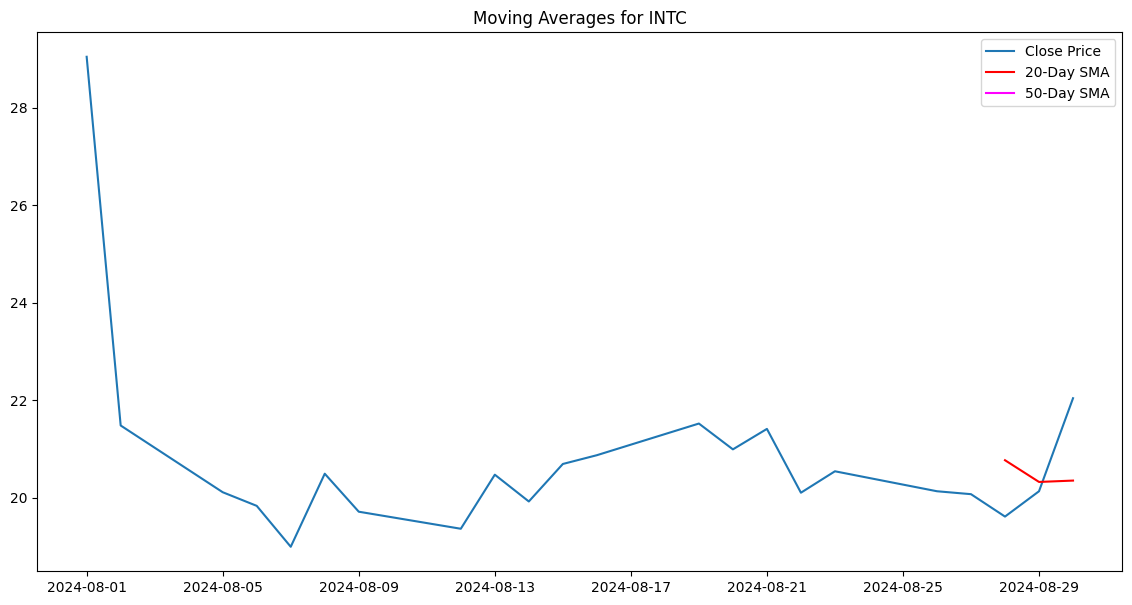

In [9]:
# Calculate Moving Averages
stock_data["20_SMA"] = stock_data["Close"].rolling(window=20).mean()
stock_data["50_SMA"] = stock_data["Close"].rolling(window=50).mean()

# Plot Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data["Close"], label="Close Price")
plt.plot(stock_data["20_SMA"], label="20-Day SMA", color="red")
plt.plot(stock_data["50_SMA"], label="50-Day SMA", color="magenta")
plt.title(f"Moving Averages for {stock}")
plt.legend()

display(plt)

7. Market Sentiment Analysis

Gather comprehensive news and updates about the stock market, conduct in-depth analysis, and provide detailed insights and forecasts.

In [10]:
def fetch_stock_news(ticker):
    url = f"https://newsapi.org/v2/everything?q={ticker}&apiKey=c27ac3ff5baa4f36abd7d6d90110da55&language=en"
    response = requests.get(url)

    if response.status_code == 200:
        news_data = response.json()
        if 'articles' in news_data:
            return news_data["articles"]
        else:
            print(f"No articles found for {ticker}. News data structure:\n{news_data}")
            return []
    else:
        print(f"Failed to fetch news for {ticker}. Status code: {response.status_code}")
        return []

def sentiment_text(value):
    match value:
        case value if value < 0:
            return "Negative"
        case value if value == 0:
            return "Neutral"
        case value if value > 0:
            return "Positive"


# Analyze sentiment
def analyze_sentiment(articles):
    sentiment_scores = []
    for article in articles:
        title = article.get("title", "") or ""
        description = article.get("description", "") or ""
        text = title + " " + description
        sentiment = TextBlob(text).sentiment.polarity
        sentiment_scores.append(sentiment)
    return sentiment_scores


articles = fetch_stock_news(ticker)

if articles:
    sentiment_scores = analyze_sentiment(articles)
    average_sentiment = np.mean(sentiment_scores)
    sentiment_score_text = sentiment_text(average_sentiment)
    
    # Display sentiment summary
    print(f"{ticker}: Average Sentiment: {average_sentiment} | {sentiment_score_text}")
    
    # Prepare articles for display in a table
    article_data = []
    for article in articles:
        article_data.append(
            {
                "Article Title": article.get("title", "N/A"),
                "Article Description": article.get("description", "N/A"),
                "Article URL": article.get("url", "N/A"),
            }
        )
    
    # Create a DataFrame and display it
    df_articles = pd.DataFrame(article_data)
    top_10_articles = df_articles.head(10)
    
    display(top_10_articles)

    # Optional: Download and save to CS
    if download:
        # Save the top 10 articles to a CSV file
        top_10_articles.to_csv("output/top_10_articles.csv", index=False)

        # Read the CSV file back into a DataFrame
        read_df = pd.read_csv("output/top_10_articles.csv")
        display(read_df)

        # Convert DataFrame to Markdown format
        markdown_table = read_df.to_markdown(index=False)

        # Save the Markdown table to a .md file
        current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        file_name = f"output/Top_news_affected_{ticker}_{current_datetime}.md"

        with open(file_name, "w") as f:
            f.write(markdown_table)

    # Display the original DataFrame
    display(df_articles)
else:
    print(f"No articles found for {ticker}. Check your API key or ticker symbol.")

INTC: Average Sentiment: 0.05118041275853776 | Positive


,Article Title,Article Description,Article URL
0,3 stocks retail investors turned to when stock...,Some retail investors used the market sell-off...,https://finance.yahoo.com/video/3-stocks-retai...
1,"Amazon trash-talks Google and Microsoft, Apple...","So far this year, the Tesla Cybertruck has bee...",https://qz.com/amazon-google-microsoft-openai-...
2,Why Super Micro Computer (SMCI) Stock Is Offer...,Super Micro Computer (SMCI) is expected to gen...,https://finance.yahoo.com/news/why-super-micro...
3,Jim Cramer Believes NVIDIA Corporation (NVDA) ...,We recently compiled a list of the Jim Cramer’...,https://finance.yahoo.com/news/jim-cramer-beli...
4,"Jim Cramer on Meta Platforms, Inc. (META): ‘Me...",We recently compiled a list of the Jim Cramer’...,https://finance.yahoo.com/news/jim-cramer-meta...
5,Why Did Intel Stock Witness The Worst Crash In...,Intel (NASDAQ: INTC) stock has nosedived almos...,https://www.forbes.com/sites/greatspeculations...
6,Intel's Collapse: This Is What Competitive Dis...,Shares of Intel (NASDAQ: INTC) crashed to a ne...,https://biztoc.com/x/25a690c543bd97e2
7,Intel: What's Going On And Why It's An Opportu...,Despite being on the back foot since the first...,https://biztoc.com/x/3da0fd29662b4b87
8,Better Artificial Intelligence Stock: Intel vs...,Since a boom in artificial intelligence (AI) k...,https://biztoc.com/x/bf63995b314d3124
9,"Intel Has Been Plummeting, Is The Stock Still ...",Intel (NASDAQ:INTC) is often seen as a laggard...,https://biztoc.com/x/b39f595003c5dd4b


,Article Title,Article Description,Article URL
0,3 stocks retail investors turned to when stock...,Some retail investors used the market sell-off...,https://finance.yahoo.com/video/3-stocks-retai...
1,"Amazon trash-talks Google and Microsoft, Apple...","So far this year, the Tesla Cybertruck has bee...",https://qz.com/amazon-google-microsoft-openai-...
2,Why Super Micro Computer (SMCI) Stock Is Offer...,Super Micro Computer (SMCI) is expected to gen...,https://finance.yahoo.com/news/why-super-micro...
3,Jim Cramer Believes NVIDIA Corporation (NVDA) ...,We recently compiled a list of the Jim Cramer’...,https://finance.yahoo.com/news/jim-cramer-beli...
4,"Jim Cramer on Meta Platforms, Inc. (META): ‘Me...",We recently compiled a list of the Jim Cramer’...,https://finance.yahoo.com/news/jim-cramer-meta...
...,...,...,...
95,Prediction: This Artificial Intelligence (AI) ...,Prediction: This Artificial Intelligence (AI) ...,https://biztoc.com/x/7a34d769bd45bbab
96,Why Intel Shares Are Moving Higher Today,Intel (NASDAQ: INTC) has been moving in the wr...,https://biztoc.com/x/e7a07d7be87b13b0
97,Intel CEO Pat Gelsinger to pitch board on plan...,Intel INTC-Q CEO Pat Gelsinger and key executi...,https://biztoc.com/x/33161f1ca887872b
98,"Sorry, Intel Doesn't Deserve the Benefit of th...",Intel (NASDAQ: INTC) shares popped by 9.5% on ...,https://biztoc.com/x/102107b418dc5906


8. Simulate Trading Strategies

In [11]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
stock_data.set_index("Date", inplace=True)

# Calculate moving averages
def calculate_moving_average(data, window_size, column="Close"):
    return data[column].rolling(window=window_size).mean()


short_window = 50
long_window = 200

stock_data["Short_MA"] = calculate_moving_average(stock_data, short_window)
stock_data["Long_MA"] = calculate_moving_average(stock_data, long_window)


# Generate signals based on moving average crossover
def generate_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals["Signal"] = 0.0

    # Generate buy signals: short-term crosses above long-term
    signals.loc[data["Short_MA"] > data["Long_MA"], "Signal"] = 1.0

    # Generate sell signals: short-term crosses below long-term
    signals.loc[data["Short_MA"] < data["Long_MA"], "Signal"] = -1.0

    # Calculate positions (holding -1 for sell, 1 for buy)
    signals["Position"] = signals["Signal"].diff()

    return signals


signals = generate_signals(stock_data)


# Backtest strategy
def backtest_strategy(data, signals, initial_capital=100000):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions["Stock"] = 100 * signals["Signal"]  # Assuming buying 100 shares per trade

    portfolio = positions.multiply(data["Close"], axis=0)
    pos_diff = positions.diff()

    portfolio["Holdings"] = (positions.multiply(data["Close"], axis=0)).sum(axis=1)
    portfolio["Cash"] = (
        initial_capital
        - (pos_diff.multiply(data["Close"], axis=0)).sum(axis=1).cumsum()
    )

    portfolio["Total"] = portfolio["Holdings"] + portfolio["Cash"]
    portfolio["Returns"] = portfolio["Total"].pct_change()

    return portfolio


backtest_results = backtest_strategy(stock_data, signals)

Evaluate and Visualize Results

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

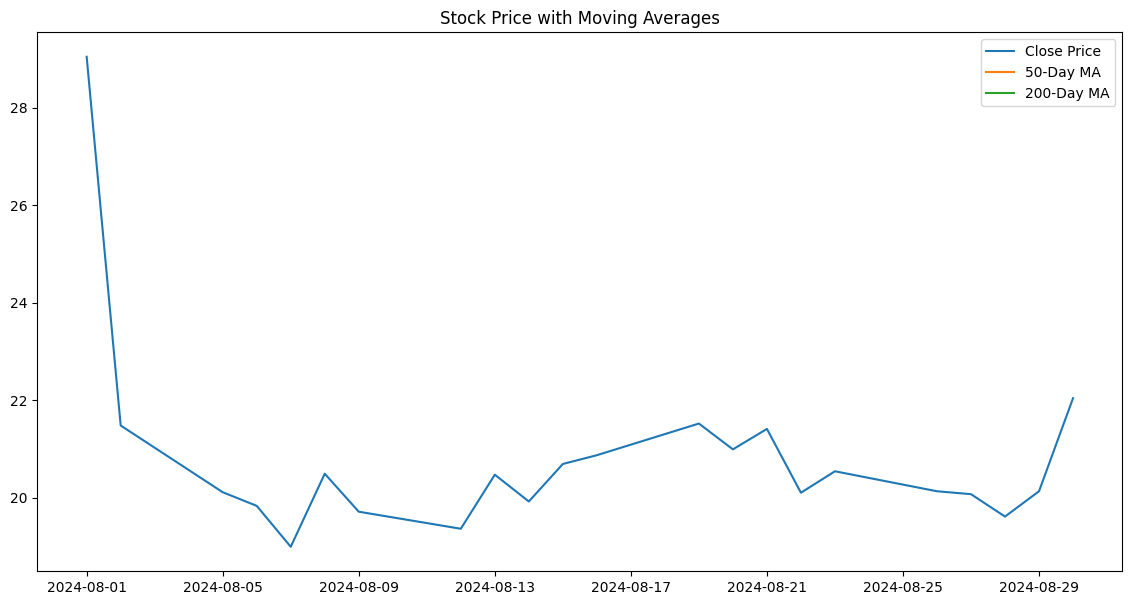

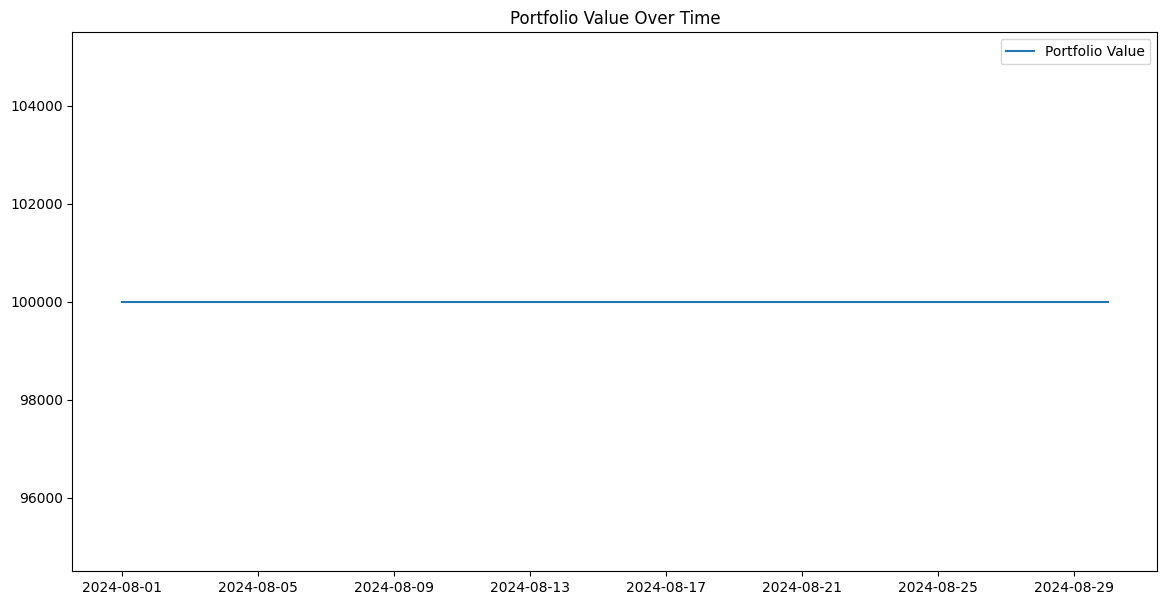

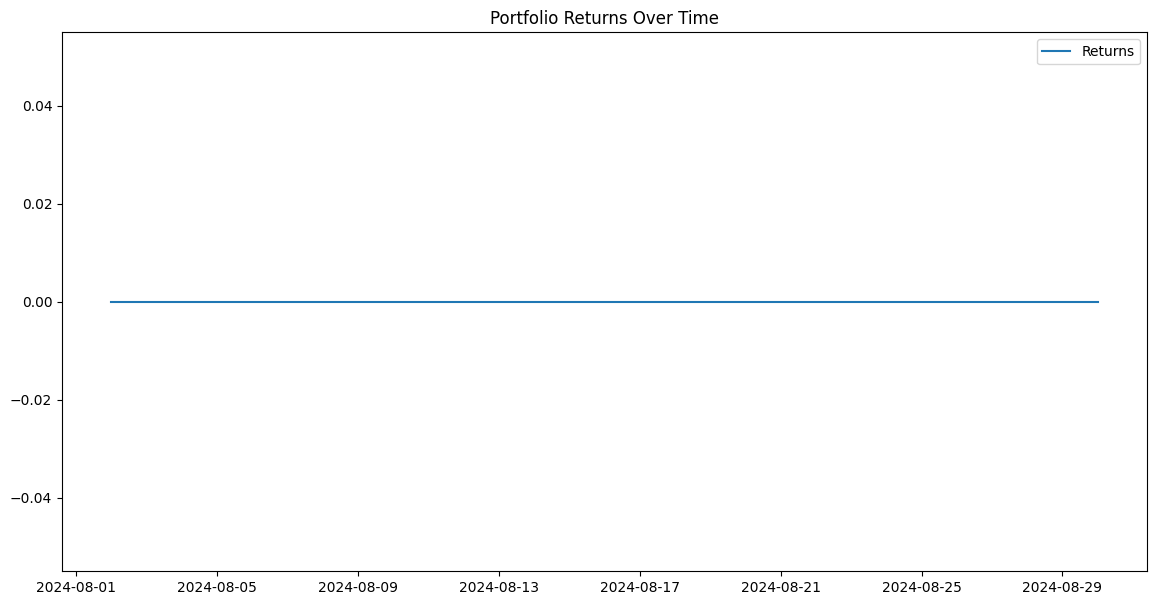

In [12]:
# Plot the stock price along with moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data["Close"], label="Close Price")
plt.plot(stock_data["Short_MA"], label=f"{short_window}-Day MA")
plt.plot(stock_data["Long_MA"], label=f"{long_window}-Day MA")
plt.title("Stock Price with Moving Averages")
plt.legend()


# Plot portfolio value and returns
plt.figure(figsize=(14, 7))
plt.plot(backtest_results["Total"], label="Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.legend()

plt.figure(figsize=(14, 7))
plt.plot(backtest_results["Returns"], label="Returns")
plt.title("Portfolio Returns Over Time")
plt.legend()

display(plt)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

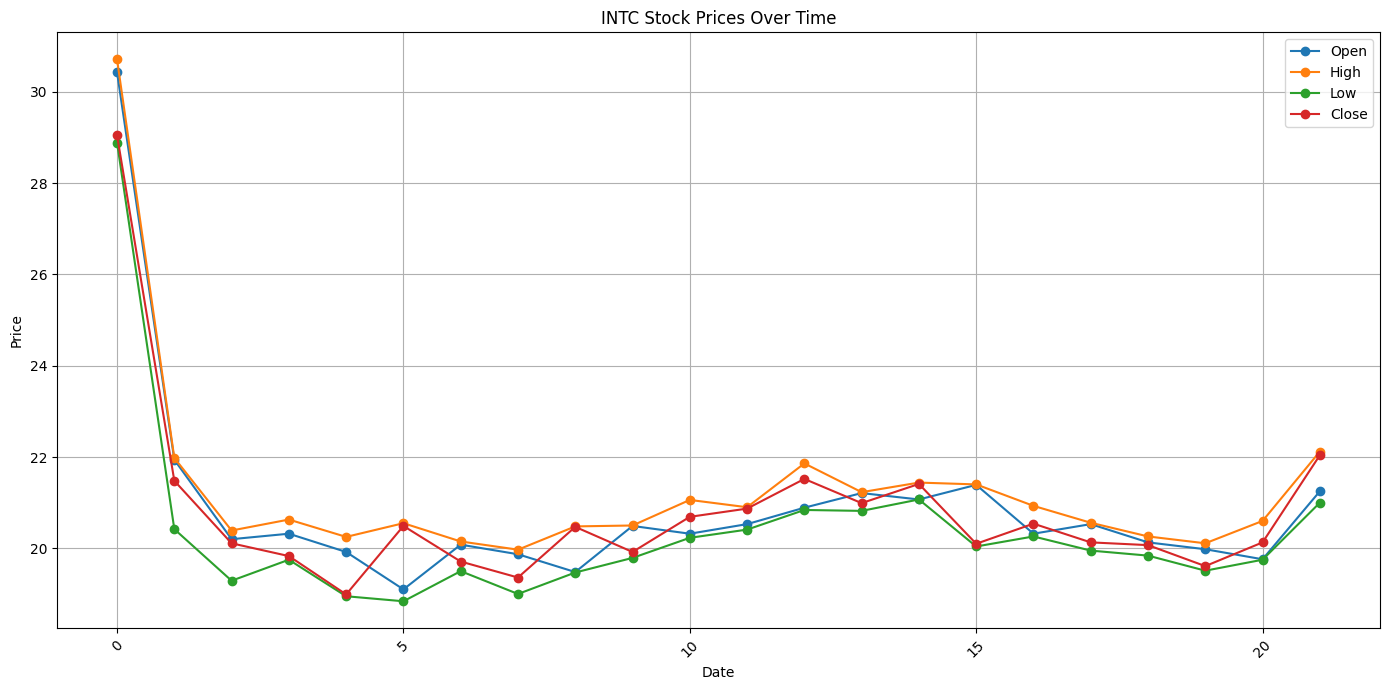

In [13]:
dd = pd.DataFrame(stock_data)

stock_data.reset_index(inplace=True)

plt.figure(figsize=(14, 7))

# Plotting the data
plt.plot(dd.index, dd["Open"], marker="o", label="Open")
plt.plot(dd.index, dd["High"], marker="o", label="High")
plt.plot(dd.index, dd["Low"], marker="o", label="Low")
plt.plot(dd.index, dd["Close"], marker="o", label="Close")

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"{ticker} Stock Prices Over Time")
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.grid(True)

display(plt)